In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [6]:
# Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

# Convert numpy doubles array to torch float32
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

In [10]:
# Create model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [13]:
# Set loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss() # We use Mean Square Error beacuse it's a linear regression problem
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [14]:
# Training
n_epochs = 100

for epoch in range(n_epochs):
    # forward pass
    y_pred = model(X)
    loss = criterion(y_pred, y)

    # backward pass
    loss.backward()

    # update weights
    optimizer.step()

    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f"epoch: {epoch+1}, loss: {loss.item():.4f}")

epoch: 10, loss: 4307.7695
epoch: 20, loss: 3215.8271
epoch: 30, loss: 2425.6807
epoch: 40, loss: 1853.3114
epoch: 50, loss: 1438.2898
epoch: 60, loss: 1137.0863
epoch: 70, loss: 918.3036
epoch: 80, loss: 759.2653
epoch: 90, loss: 643.5746
epoch: 100, loss: 559.3619


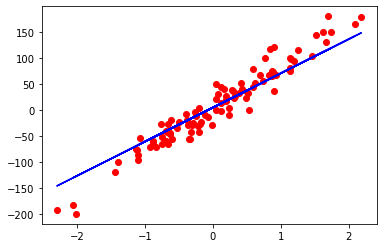

In [15]:
# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()